## PyEarth Examples
Examples from https://contrib.scikit-learn.org/py-earth/auto_examples/index.html

In [1]:
from platform import python_version
import numpy
import matplotlib
import sklearn

In [2]:
print(f"""
Python version is {python_version()} with the packages
Numpy version: {numpy.__version__},
Matplotlib version: {matplotlib.__version__}, and 
Sklearn version: {sklearn.__version__}
""")


Python version is 3.11.6 with the packages
Numpy version: 1.26.2,
Matplotlib version: 3.8.1, and 
Sklearn version: 1.3.2



### 1. Exporting a fitted Earth models as a sympy expression

In [3]:
import numpy
from pyearth import Earth
from pyearth import export

# Create some fake data
numpy.random.seed(2)
m = 1000
n = 10
X = 10 * numpy.random.uniform(size=(m, n)) - 40
y = 100 * \
    (numpy.sin((X[:, 6])) - 4.0) + \
    10 * numpy.random.normal(size=m)

# Fit an Earth model
model = Earth(max_degree=2, minspan_alpha=.5, verbose=False)
model.fit(X, y)

print(model.summary())

#return sympy expression
print('Resulting sympy expression:')
print(export.export_sympy(model))

Earth Model
----------------------------------------------------
Basis Function                 Pruned  Coefficient  
----------------------------------------------------
(Intercept)                    No      -360.159     
h(x6+36.8964)                  No      -88.7914     
h(-36.8964-x6)                 Yes     None         
h(x6+33.7644)*h(x6+36.8964)    No      24.6159      
h(-33.7644-x6)*h(x6+36.8964)   Yes     None         
h(x6+38.8328)*h(-36.8964-x6)   No      -22.8812     
h(-38.8328-x6)*h(-36.8964-x6)  No      37.5099      
h(x6+32.7734)                  No      89.271       
h(-32.7734-x6)                 Yes     None         
h(x6+30.8809)*h(x6+32.7734)    No      -16.9256     
h(-30.8809-x6)*h(x6+32.7734)   No      -14.5195     
h(x6+34.5078)*h(x6+36.8964)    No      -18.7344     
h(-34.5078-x6)*h(x6+36.8964)   No      39.3114      
h(x6+37.5227)                  No      54.6062      
h(-37.5227-x6)                 No      -100.603     
----------------------------------

### 2. Plotting the absolute value function

Forward Pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     150.123858  1      150.425  0.000  0.000  
1     0       6    595   0.923957    3      0.935    0.994  0.994  
2     0       6    813   0.911088    5      0.931    0.994  0.994  
-------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
------------------------------------------------
iter  bf  terms  mse     gcv      rsq    grsq   
------------------------------------------------
0     -   5      0.91    0.931    0.994  0.994  
1     4   4      0.91    0.927    0.994  0.994  
2     1   3      0.91    0.923    0.994  0.994  
3     3   2      85.60   86.198   0.430  0.427  
4     2   1      150.12  150.425  0.000  0.000  
------------------------------------------------
Select

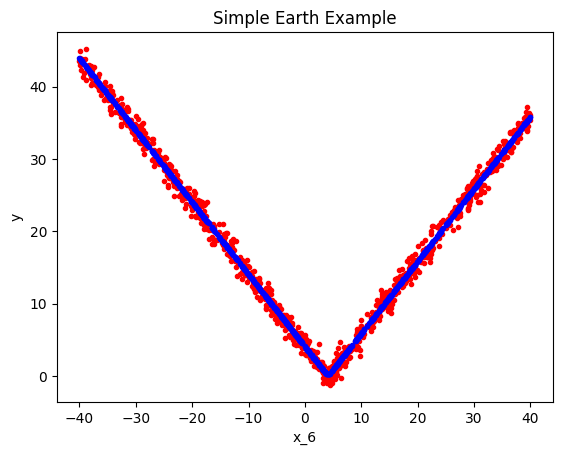

In [4]:
import numpy
import matplotlib.pyplot as plt
from pyearth import Earth

#Create some fake data
numpy.random.seed(0)
m = 1000
n = 10
X = 80*numpy.random.uniform(size=(m,n)) - 40
y = numpy.abs(X[:,6] - 4.0) + 1*numpy.random.normal(size=m)

#Fit an Earth model
model = Earth()
model.fit(X,y)

#Print the model
print(model.trace())
print(model.summary())
    
#Plot the model
y_hat = model.predict(X)
plt.figure()
plt.plot(X[:,6],y,'r.')
plt.plot(X[:,6],y_hat,'b.')
plt.xlabel('x_6')
plt.ylabel('y')
plt.title('Simple Earth Example')
plt.show()

### 3. Plotting simple since function

Beginning forward pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     5244.476631  1      5245.526  0.000  0.000  
1     0       6    9961  5067.564966  3      5073.652  0.034  0.033  
2     2       6    3206  4861.646322  5      4872.360  0.073  0.071  
3     4       6    7844  4639.910399  7      4654.794  0.115  0.113  
4     0       6    7260  4468.481532  9      4487.308  0.148  0.145  
5     7       6    8157  4244.224557  11     4266.381  0.191  0.187  
6     9       6    2242  3900.027668  13     3924.321  0.256  0.252  
7     10      6    5832  3770.613680  15     3797.909  0.281  0.276  
8     7       6    1644  3534.711068  17     3563.875  0.326  0.321  
9     15      6    3475  3314.402472  19     3345.107  0.368  0.362  
10    15      6    2648  3162.408104  21     3194.913  0.397  0.391

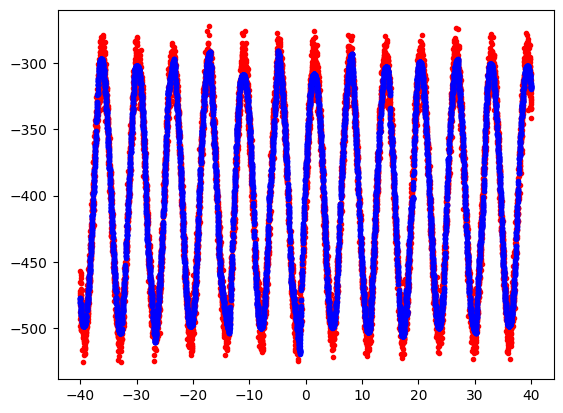

In [5]:
import numpy
import matplotlib.pyplot as plt

from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 10000
n = 10
X = 80 * numpy.random.uniform(size=(m, n)) - 40
y = 100 * \
    (numpy.sin((X[:, 6])) - 4.0) + \
    10 * numpy.random.normal(size=m)

# Fit an Earth model
model = Earth(max_degree=3, minspan_alpha=.5, verbose=True)
model.fit(X, y)

# Print the model
print(model.trace())
print(model.summary())

# Plot the model
y_hat = model.predict(X)
plt.plot(X[:, 6], y, 'r.')
plt.plot(X[:, 6], y_hat, 'b.')
plt.show()

### 4. Plotting a linear fucntion with a categorical variable

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      -0.0691357   
x0              No      2.0294       
x1              No      3.10978      
h(x2-1.27376)   No      -0.368201    
h(1.27376-x2)   Yes     None         
-------------------------------------
MSE: 0.9817, GCV: 0.9986, RSQ: 0.8626, GRSQ: 0.8606


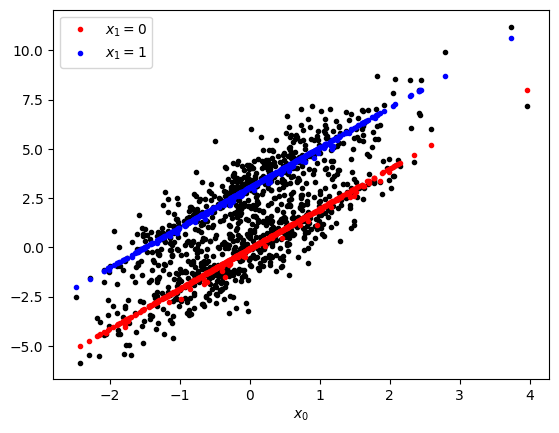

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyearth import Earth

np.random.seed(1)
m = 1000
n = 5

X = np.random.normal(size=(m, n))

# Make X[:,1] binary
X[:, 1] = np.random.binomial(1, .5, size=m)

# The response is a linear function of the inputs
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(size=m)

# Fit the earth model
model = Earth().fit(X, y)

# Print the model summary, showing linear terms
print(model.summary())

# Plot for both values of X[:,1]
y_hat = model.predict(X)
plt.figure()
plt.plot(X[:, 0], y, 'k.')
plt.plot(X[X[:, 1] == 0, 0], y_hat[X[:, 1] == 0], 'r.', label='$x_1 = 0$')
plt.plot(X[X[:, 1] == 1, 0], y_hat[X[:, 1] == 1], 'b.', label='$x_1 = 1$')
plt.legend(loc='best')
plt.xlabel('$x_0$')
plt.show()

### 5. Plotting two simple sine functions

Forward Pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     4718.876841  1      4719.821  0.000  0.000  
1     0       6    3411  3982.618784  3      3987.402  0.156  0.155  
2     1       6    7550  2563.588158  5      2569.237  0.457  0.456  
3     2       6    2668  2078.056464  7      2084.722  0.560  0.558  
4     4       6    8256  1852.024839  9      1859.828  0.608  0.606  
5     1       6    6806  1504.861988  11     1512.718  0.681  0.679  
6     3       6    4950  873.146193   13     878.585   0.815  0.814  
7     0       6    6442  475.876979   15     479.322   0.899  0.898  
8     13      6    9729  338.429537   17     341.222   0.928  0.928  
9     10      6    4788  276.946129   19     279.512   0.941  0.941  
10    14      6    716   180.666788   21     182.524   0.962  0.961  
11    9

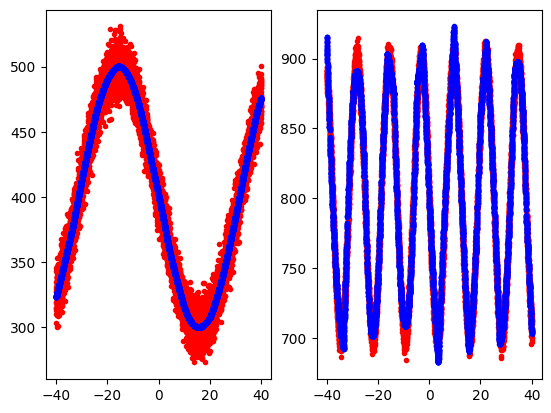

In [7]:
import numpy
import matplotlib.pyplot as plt

from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 10000
n = 10
X = 80 * numpy.random.uniform(size=(m, n)) - 40
y1 = 100 * \
    numpy.abs(numpy.sin((X[:, 6]) / 10) - 4.0) + \
    10 * numpy.random.normal(size=m)

y2 = 100 * \
    numpy.abs(numpy.sin((X[:, 6]) / 2) - 8.0) + \
    5 * numpy.random.normal(size=m)

# Fit an Earth model
model = Earth(max_degree=3, minspan_alpha=.5)
y_mix = numpy.concatenate((y1[:, numpy.newaxis], y2[:, numpy.newaxis]), axis=1)
model.fit(X, y_mix)

# Print the model
print(model.trace())
print(model.summary())

# Plot the model
y_hat = model.predict(X)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
ax.plot(X[:, 6], y_mix[:, 0], 'r.')
ax.plot(X[:, 6], model.predict(X)[:, 0], 'b.')

ax = fig.add_subplot(1, 2, 2)
ax.plot(X[:, 6], y_mix[:, 1], 'r.')
ax.plot(X[:, 6], model.predict(X)[:, 1], 'b.')
plt.show()

### Plotting feature importance

Beginning forward pass
-----------------------------------------------------------------
iter  parent  var  knot  mse        terms  gcv     rsq    grsq   
-----------------------------------------------------------------
0     -       -    -     24.101072  1      24.106  0.000  0.000  
1     0       3    -1    15.626212  2      15.637  0.352  0.351  
2     0       1    2446  10.884011  4      10.903  0.548  0.548  
3     0       0    43    6.386236  6      6.404  0.735  0.734  
4     0       2    3272  4.226153  8      4.242  0.825  0.824  
5     0       4    -1    2.136919  9      2.146  0.911  0.911  
6     4       1    9815  1.113502  11     1.119  0.954  0.954  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms
Beginning pruning pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   11     1.11  1.119  0.954  0.954  
1   

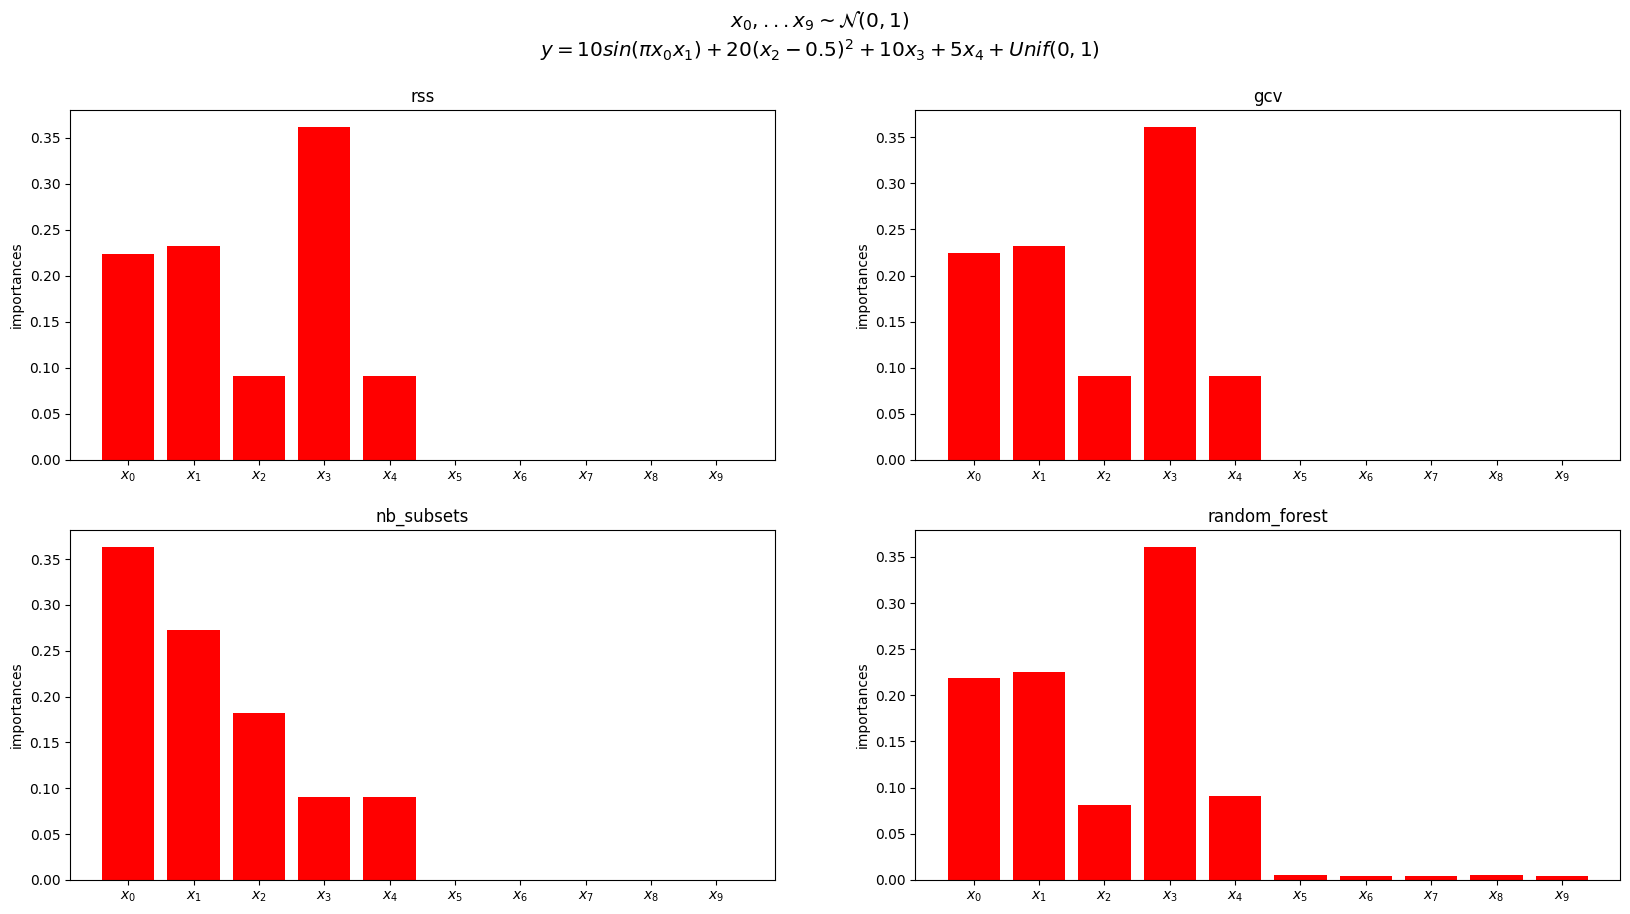

In [8]:
import numpy
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 10000
n = 10

X = numpy.random.uniform(size=(m, n))
y = (10 * numpy.sin(numpy.pi * X[:, 0] * X[:, 1]) +
     20 * (X[:, 2] - 0.5) ** 2 +
     10 * X[:, 3] +
     5 * X[:, 4] + numpy.random.uniform(size=m))
# Fit an Earth model
criteria = ('rss', 'gcv', 'nb_subsets')
model = Earth(max_degree=3,
              max_terms=10,
              minspan_alpha=.5,
              feature_importance_type=criteria,
              verbose=True)
model.fit(X, y)
rf = RandomForestRegressor()
rf.fit(X, y)
# Print the model
print(model.trace())
print(model.summary())
print(model.summary_feature_importances(sort_by='gcv'))

# Plot the feature importances
importances = model.feature_importances_
importances['random_forest'] = rf.feature_importances_
criteria = criteria + ('random_forest',)
idx = 1

fig = plt.figure(figsize=(20, 10))
labels = ['$x_{}$'.format(i) for i in range(n)]
for crit in criteria:
    plt.subplot(2, 2, idx)
    plt.bar(numpy.arange(len(labels)),
            importances[crit],
            align='center',
            color='red')
    plt.xticks(numpy.arange(len(labels)), labels)
    plt.title(crit)
    plt.ylabel('importances')
    idx += 1
title = '$x_0,...x_9 \sim \mathcal{N}(0, 1)$\n$y= 10sin(\pi x_{0}x_{1}) + 20(x_2 - 0.5)^2 + 10x_3 + 5x_4 + Unif(0, 1)$'
fig.suptitle(title, fontsize="x-large")
plt.show()

### Plotting sine function with redundant predictors an missing data

Beginning forward pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     4399.475105  1      4400.355  0.000  0.000  
1     0       6    484   3218.483595  5      3225.576  0.268  0.267  
2     3       6    7115  1000.391186  7      1003.600  0.773  0.772  
3     0       5    1997  864.312945  11     868.825  0.804  0.803  
4     10      5    584   587.114557  13     590.772  0.867  0.866  
5     3       5    2524  366.228678  17     369.250  0.917  0.916  
6     10      6    7684  282.071970  21     284.971  0.936  0.935  
7     5       6    4061  278.822247  23     281.971  0.937  0.936  
-------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold
Beginning pruning pass
------------------------------------------------
iter  bf  terms  mse     gc

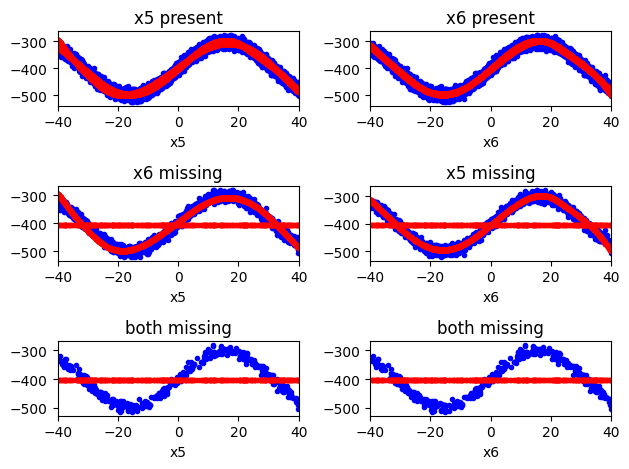

In [9]:
import numpy
import matplotlib.pyplot as plt

from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 10000
n = 10
X = 80 * numpy.random.uniform(size=(m, n)) - 40
X[:, 5] = X[:, 6] + numpy.random.normal(0, .1, m)
y = 100 * \
    (numpy.sin((X[:, 5] + X[:, 6]) / 20) - 4.0) + \
    10 * numpy.random.normal(size=m)
missing = numpy.random.binomial(1, .2, (m, n)).astype(bool)
X_full = X.copy()
X[missing] = None
idx5 = (1 - missing[:, 5]).astype(bool)
idx6 = (1 - missing[:, 6]).astype(bool)

# Fit an Earth model
model = Earth(max_degree=5, minspan_alpha=.5, allow_missing=True,
              enable_pruning=True, thresh=.001, smooth=True, verbose=2)
model.fit(X, y)
# Print the model
print(model.summary())

# Plot the model
y_hat = model.predict(X)
fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(X_full[idx5, 5], y[idx5], 'b.')
ax1.plot(X_full[idx5, 5], y_hat[idx5], 'r.')
ax1.set_xlim(-40, 40)
ax1.set_title('x5 present')
ax1.set_xlabel('x5')

ax2 = fig.add_subplot(3, 2, 2)
ax2.plot(X_full[idx6, 6], y[idx6], 'b.')
ax2.plot(X_full[idx6, 6], y_hat[idx6], 'r.')
ax2.set_xlim(-40, 40)
ax2.set_title('x6 present')
ax2.set_xlabel('x6')

ax3 = fig.add_subplot(3, 2, 3, sharex=ax1)
ax3.plot(X_full[~idx6, 5], y[~idx6], 'b.')
ax3.plot(X_full[~idx6, 5], y_hat[~idx6], 'r.')
ax3.set_title('x6 missing')
ax3.set_xlabel('x5')

ax4 = fig.add_subplot(3, 2, 4, sharex=ax2)
ax4.plot(X_full[~idx5, 6], y[~idx5], 'b.')
ax4.plot(X_full[~idx5, 6], y_hat[~idx5], 'r.')
ax4.set_title('x5 missing')
ax4.set_xlabel('x6')

ax5 = fig.add_subplot(3, 2, 5, sharex=ax1)
ax5.plot(X_full[(~idx6) & (~idx5), 5], y[(~idx6) & (~idx5)], 'b.')
ax5.plot(X_full[(~idx6) & (~idx5), 5], y_hat[(~idx6) & (~idx5)], 'r.')
ax5.set_title('both missing')
ax5.set_xlabel('x5')

ax6 = fig.add_subplot(3, 2, 6, sharex=ax2)
ax6.plot(X_full[(~idx6) & (~idx5), 6], y[(~idx6) & (~idx5)], 'b.')
ax6.plot(X_full[(~idx6) & (~idx5), 6], y_hat[(~idx6) & (~idx5)], 'r.')
ax6.set_title('both missing')
ax6.set_xlabel('x6')

fig.tight_layout()
plt.show()

### Plotting a multicolumn regression problem that includes missingness

In [ ]:
import numpy
import matplotlib.pyplot as plt

from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 10000
n = 10
X = 80 * numpy.random.uniform(size=(m, n)) - 40
X[:, 5] = X[:, 6] + numpy.random.normal(0, .1, m)
y1 = 100 * \
    (numpy.sin((X[:, 5] + X[:, 6]) / 20) - 4.0) + \
    10 * numpy.random.normal(size=m)
y2 = 100 * \
    (numpy.cos((X[:, 5] + X[:, 6]) / 20) - 4.0) + \
    10 * numpy.random.normal(size=m)
y = numpy.concatenate([y1[:, None], y2[:, None]], axis=1)
missing = numpy.random.binomial(1, .2, (m, n)).astype(bool)
X_full = X.copy()
X[missing] = None
idx5 = (1 - missing[:, 5]).astype(bool)
idx6 = (1 - missing[:, 6]).astype(bool)

# Fit an Earth model
model = Earth(max_degree=5, minspan_alpha=.5, allow_missing=True,
              enable_pruning=True, thresh=.001, smooth=True,
              verbose=True)
model.fit(X, y)

# Print the model
print(model.trace())
print(model.summary())

# Plot the model
y_hat = model.predict(X)
fig = plt.figure()

for j in [0, 1]:
    ax1 = fig.add_subplot(3, 4, 1 + 2*j)
    ax1.plot(X_full[idx5, 5], y[idx5, j], 'b.')
    ax1.plot(X_full[idx5, 5], y_hat[idx5, j], 'r.')
    ax1.set_xlim(-40, 40)
    ax1.set_title('x5 present')
    ax1.set_xlabel('x5')
    ax1.set_ylabel('sin' if j == 0 else 'cos')

    ax2 = fig.add_subplot(3, 4, 2 + 2*j)
    ax2.plot(X_full[idx6, 6], y[idx6, j], 'b.')
    ax2.plot(X_full[idx6, 6], y_hat[idx6, j], 'r.')
    ax2.set_xlim(-40, 40)
    ax2.set_title('x6 present')
    ax2.set_xlabel('x6')
    ax2.set_ylabel('sin' if j == 0 else 'cos')

    ax3 = fig.add_subplot(3, 4, 5 + 2*j, sharex=ax1)
    ax3.plot(X_full[~idx6, 5], y[~idx6, j], 'b.')
    ax3.plot(X_full[~idx6, 5], y_hat[~idx6, j], 'r.')
    ax3.set_title('x6 missing')
    ax3.set_xlabel('x5')
    ax3.set_ylabel('sin' if j == 0 else 'cos')

    ax4 = fig.add_subplot(3, 4, 6 + 2*j, sharex=ax2)
    ax4.plot(X_full[~idx5, 6], y[~idx5, j], 'b.')
    ax4.plot(X_full[~idx5, 6], y_hat[~idx5, j], 'r.')
    ax4.set_title('x5 missing')
    ax4.set_xlabel('x6')
    ax4.set_ylabel('sin' if j == 0 else 'cos')

    ax5 = fig.add_subplot(3, 4, 9 + 2*j, sharex=ax1)
    ax5.plot(X_full[(~idx6) & (~idx5), 5], y[(~idx6) & (~idx5), j], 'b.')
    ax5.plot(X_full[(~idx6) & (~idx5), 5], y_hat[(~idx6) & (~idx5), j], 'r.')
    ax5.set_title('both missing')
    ax5.set_xlabel('x5')
    ax5.set_ylabel('sin' if j == 0 else 'cos')

    ax6 = fig.add_subplot(3, 4, 10 + 2*j, sharex=ax2)
    ax6.plot(X_full[(~idx6) & (~idx5), 6], y[(~idx6) & (~idx5), j], 'b.')
    ax6.plot(X_full[(~idx6) & (~idx5), 6], y_hat[(~idx6) & (~idx5), j], 'r.')
    ax6.set_title('both missing')
    ax6.set_xlabel('x6')
    ax6.set_ylabel('sin' if j == 0 else 'cos')

fig.tight_layout()
plt.show()

Beginning forward pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     4893.487156  1      4894.466  0.000  0.000  
1     0       6    2137  2847.382972  5      2853.658  0.418  0.417  
2     3       6    1882  1604.340050  7      1609.486  0.672  0.671  
3     4       6    3981  1091.500435  9      1096.099  0.777  0.776  
4     0       5    3872  865.760445  13     871.153  0.823  0.822  
5     1       5    6251  677.549203  17     683.139  0.862  0.860  
6     11      5    7295  529.902178  19     534.811  0.892  0.891  
7     3       5    1687  429.663455  23     434.516  0.912  0.911  
8     12      5    8217  356.999523  25     361.395  0.927  0.926  
9     12      6    6100  311.472399  29     315.943  0.936  0.935  
10    23      5    7367  305.785820  31     310.487  0.938  0.937  
11    5    

### Plotting sckit-learn classifiers comparison with Earth

In [ ]:
# Code source: Gael Varoqueux
#              Andreas Mueller
# Modified for Documentation merge by Jaques Grobler
# License: BSD 3 clause
# Modified to include pyearth by Jason Rudy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from pyearth.earth import Earth

print(__doc__)

h = .02  # step size in the mesh

np.random.seed(1)

# Combine Earth with LogisticRegression in a pipeline to do classification
earth_classifier = Pipeline([('earth', Earth(max_degree=3, penalty=1.5)),
                             ('logistic', LogisticRegression())])

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes", "LDA", "QDA", "Earth"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    LDA(),
    QDA(),
    earth_classifier]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        try:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        except NotImplementedError:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.savefig('classifier_comp.pdf', transparent=True)
plt.show()